In [2]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
    parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
    sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

    if '%s/uoicorr' % p not in sys.path:
        sys.path.append('%s/uoicorr' % p)
    if '%s/PyUoI' % p not in sys.path:
        sys.path.append('%s/PyUoI' % p)

else:
    # And standard list of subdirectories
    if '%s\\pyuoi' % p not in sys.path:
        sys.path.append('%s\\pyuoi' % p)
    if '%s\\uoicorr' % p not in sys.path:
        sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir
from utils import FNR, FPR, selection_accuracy

In [5]:
data_en = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\02082019e')

(300, 25)


In [10]:
data = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\02082019d', skip_bad = True)

(600, 25)


In [12]:
uoil = data.loc[data['exp_type'] == 'UoILasso']
uoien = data.loc[data['exp_type'] == 'UoIElasticNet']
en = data_en

In [13]:
# Make separate plots for each sparsity, plot as a function of falloff distance

# Select the relevant data:
dat_uoil = []
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.2)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.4)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.6)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.8)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 1)])

# Select the relevant data:
dat_uoien = []
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.2)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.4)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.6)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.8)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 1)])

# Select the relevant data:
dat_en = []
dat_en.append(en.loc[(en['sparsity'] == 0.2)])
dat_en.append(en.loc[(en['sparsity'] == 0.4)])
dat_en.append(en.loc[(en['sparsity'] == 0.6)])
dat_en.append(en.loc[(en['sparsity'] == 0.8)])
dat_en.append(en.loc[(en['sparsity'] == 1)])

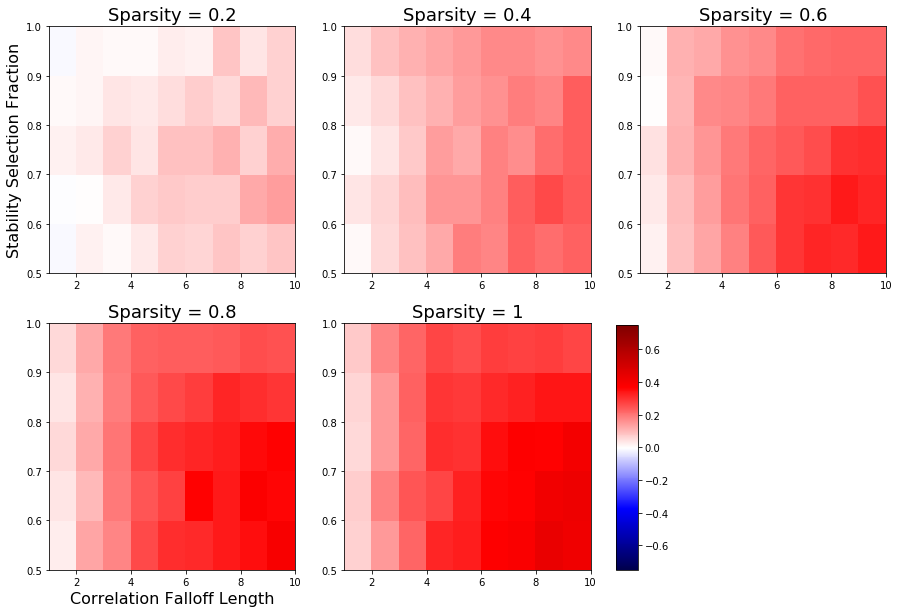

In [56]:
# Make 2D plots of false negatives, false positives as a function of stability selection and correlation parameter. 
stability_selection = np.unique(dat_uoil[0]['stability_selection'])
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i in range(len(dat_uoil)):
    uoil_fn = np.zeros((len(stability_selection), len(L)))
    uoien_fn = np.zeros(uoil_fn.shape)
    
    for j, ss in enumerate(stability_selection):
        for k, ll in enumerate(L):
            d1 = dat_uoil[i].loc[(dat_uoil[i]['stability_selection'] == ss) & (dat_uoil[i]['cov_params'] == {'L': ll})]
            d2 = dat_uoien[i].loc[(dat_uoien[i]['stability_selection'] == ss) & (dat_uoien[i]['cov_params'] == {'L': ll})]
            uoil_fn[j, k] = np.mean(FNR(d1.iloc[0].betas, d1.iloc[0].beta_hats))
            uoien_fn[j, k] = np.mean(FNR(d2.iloc[0].betas, d2.iloc[0].beta_hats))

    a = ax[np.unravel_index(i, (2, 3))]
    cmesh = a.pcolormesh(L, stability_selection, uoil_fn - uoien_fn, vmin = -0.75, vmax = 0.75, cmap = 'seismic')#, shading =  'gouraud')

fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('Stability Selection Fraction', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Correlation Falloff Length', fontsize=16)
cax = fig.add_axes([0.65, 0.125, 0.02, 0.34])
plt.colorbar(cmesh, cax = cax)

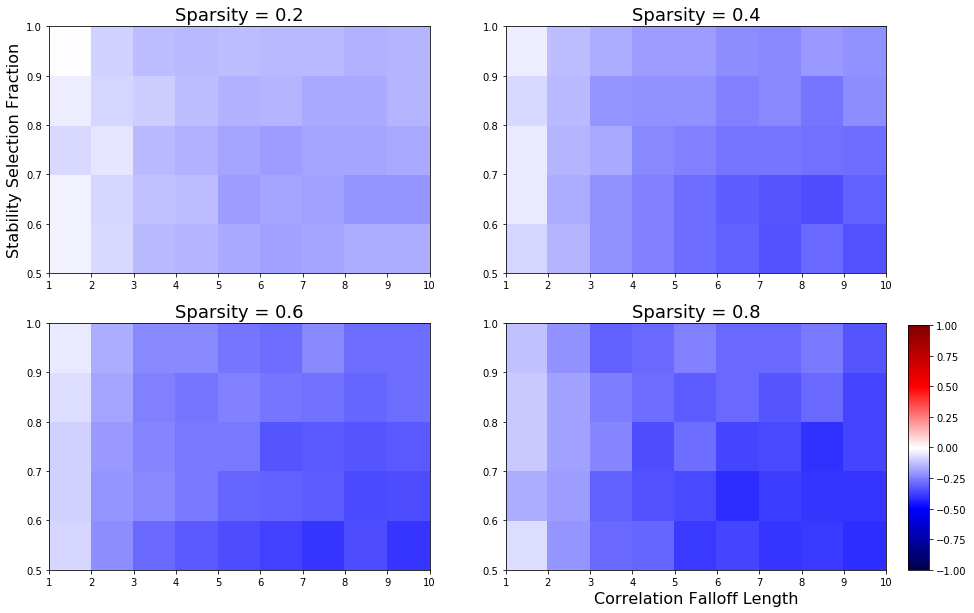

In [57]:
stability_selection = np.unique(dat_uoil[0]['stability_selection'])
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparsity = [0.2, 0.4, 0.6, 0.8]
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

for i in range(len(dat_uoil) - 1):
    uoil_fp = np.zeros((len(stability_selection), len(L)))
    uoien_fp = np.zeros(uoil_fn.shape)
    
    for j, ss in enumerate(stability_selection):
        for k, ll in enumerate(L):
            d1 = dat_uoil[i].loc[(dat_uoil[i]['stability_selection'] == ss) & (dat_uoil[i]['cov_params'] == {'L': ll})]
            d2 = dat_uoien[i].loc[(dat_uoien[i]['stability_selection'] == ss) & (dat_uoien[i]['cov_params'] == {'L': ll})]
            uoil_fp[j, k] = np.mean(FPR(d1.iloc[0].betas, d1.iloc[0].beta_hats))
            uoien_fp[j, k] = np.mean(FPR(d2.iloc[0].betas, d2.iloc[0].beta_hats))

    a = ax[np.unravel_index(i, (2, 2))]
    cmesh = a.pcolormesh(L, stability_selection, uoil_fp - uoien_fp, vmin = -1, vmax = 1, cmap = 'seismic')#, shading =  'gouraud')

ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 2))].set_ylabel('Stability Selection Fraction', fontsize=16)
ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_xlabel('Correlation Falloff Length', fontsize=16)
cax = fig.add_axes([0.92, 0.125, 0.02, 0.34])
plt.colorbar(cmesh, cax = cax)

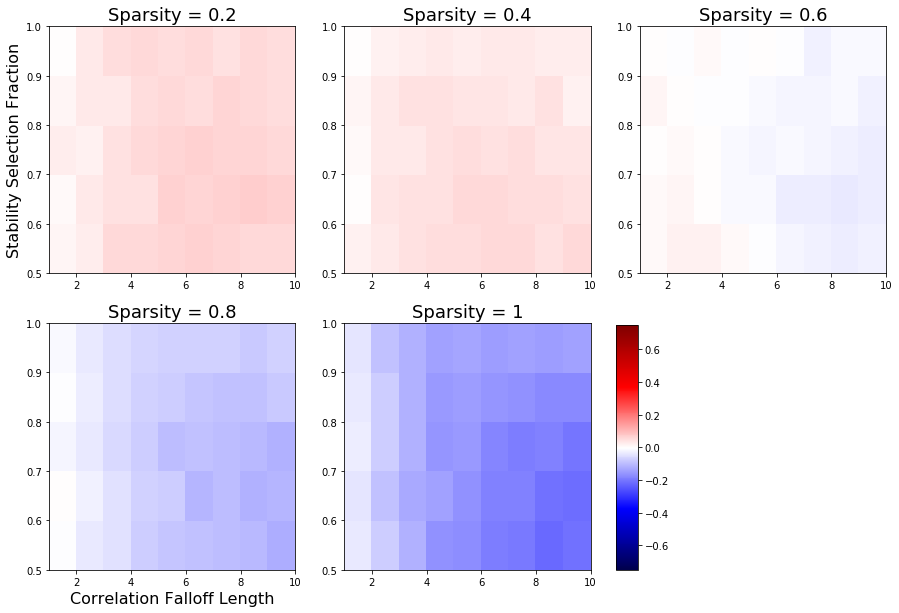

In [59]:
# Make 2D plots of false negatives, false positives as a function of stability selection and correlation parameter. 
stability_selection = np.unique(dat_uoil[0]['stability_selection'])
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i in range(len(dat_uoil)):
    uoil_fn = np.zeros((len(stability_selection), len(L)))
    uoien_fn = np.zeros(uoil_fn.shape)
    
    for j, ss in enumerate(stability_selection):
        for k, ll in enumerate(L):
            d1 = dat_uoil[i].loc[(dat_uoil[i]['stability_selection'] == ss) & (dat_uoil[i]['cov_params'] == {'L': ll})]
            d2 = dat_uoien[i].loc[(dat_uoien[i]['stability_selection'] == ss) & (dat_uoien[i]['cov_params'] == {'L': ll})]
            uoil_fn[j, k] = np.mean(selection_accuracy(d1.iloc[0].betas, d1.iloc[0].beta_hats))
            uoien_fn[j, k] = np.mean(selection_accuracy(d2.iloc[0].betas, d2.iloc[0].beta_hats))

    a = ax[np.unravel_index(i, (2, 3))]
    cmesh = a.pcolormesh(L, stability_selection, uoil_fn - uoien_fn, vmin = -0.75, vmax = 0.75, cmap = 'seismic')#, shading =  'gouraud')

fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('Stability Selection Fraction', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Correlation Falloff Length', fontsize=16)
cax = fig.add_axes([0.65, 0.125, 0.02, 0.34])
plt.colorbar(cmesh, cax = cax)